## 1. 환경 초기화

### 1-1. 분석 목표 설정

### 1-2. 데이터 할당

## 2. 데이터 수집

### 2-1. 데이터 정의

### 2-2. 데이터 출처 탐색 및 수집

### 2-3. 데이터 검증 (정확성, 결측치 유무 확인)

## 3. 데이터 전처리

### 3-1. 결측치 처리

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

'''0. raw data 전처리 과정'''

#월별(month) / 일별(day)데이터를 나눠 데이터 전처리

# df_month = pd.read_csv('KRW_Month.csv', encoding='cp949')
# df_day = pd.read_csv('KRW_Day.csv', encoding='cp949')


# df_month.head()

'0. raw data 전처리 과정'

In [6]:
# df_day.head()

In [7]:
# df_month.plot()
# df_day.plot()

In [8]:
'''1. political index 전처리 과정'''

# from google.colab import drive
# drive.mount('/content/drive')

df_political_raw = pd.read_csv('P_Data_Extract_From_Worldwide_Governance.csv', encoding='cp949')

df_political = df_political_raw.transpose()


df_political.rename(columns=df_political.iloc[0], inplace=True)	# 행열이 전환된 데이터프레임의 열 이름 제대로 수정
df_political = df_political.drop(df_political.index[0])
df_political.dropna(axis=1)
df_political.head()

os.chdir('/content')
df_political.to_csv('df_political.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'P_Data_Extract_From_Worldwide_Governance.csv'

### 3-2. 이상치 처리

### 3-3. 데이터 정규화

## 4. 모델 구축

### 4-1. 변수 선택

In [ ]:
# pwd

In [ ]:
# PsI (Political Score Index) 데이터 전처리
import pandas as pd
import matplotlib.pyplot as plt
import os

# from google.colab import drive
# drive.mount('/content/drive')

df_political = pd.read_csv('df_political.csv', encoding='cp949')
df = df_political

In [ ]:
df = df_political
# 결측치 확인
df.isnull()
# 모든 데이터가 NaN 인 경우, 해당 컬럼을 삭제
df = df.dropna(axis = 'columns', how = 'all')
# 새 테이블을 만들고
df.isnull()

# df_political.dtypes
# for i in range(len(df_political)):
  # df['india_PSA+GE'] = df['India'] + df['India.1']


In [ ]:
# 폰트 깨짐 현상 해결
# 참고 : https://teddylee777.github.io/colab/colab-korean/
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### 4-2. 변수 선택2

In [44]:
# !pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy
# import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# from tensorflow.python.keras.optimizer_v2 import adam 
# from tensorflow.python.keras.optimizers import adam_v2
from tensorflow.keras.layers import LSTM, Dense
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

# 샘플 데이터 생성
# np.random.seed(0)

# 날짜 범위 생성
date_range = pd.date_range(start='2010-01-01', end='2022-12-31', freq='MS')

###

# USD >> JPY

# USD 환율
# USD_exchange_rate = pd.read_csv('exchange_rate/USD(M).csv', encoding='utf-8')
# 환율
exchange_rate = pd.read_csv('exchange_rate.csv')
GDP = pd.read_csv('exchange_rate/GDP_for_train.csv', encoding='utf-8')
ir = pd.read_csv('exchange_rate/interest_rate_for_train_merged_final.csv', encoding='utf-8')
# print(exchange_rate.isna())
exchange_rate = exchange_rate.dropna(axis=1)
print(exchange_rate.columns)
# 미국>한국 환율
USDtoKRW = exchange_rate['USDKRW=X']
# 미국>일본 환율
USDtoJPY = exchange_rate['USDJPY=X']
# # 미국>캐나다 환율
# USDtoMXN = USD_exchange_rate['MXN/USD']
# JPY GDP
USD_GDP = GDP['USD']
# JPY ir
JPY_IR = ir['Japan_Interest Rate(percent)']

USDtoKRW_np = USDtoKRW.to_numpy()
USDtoJPY_np = USDtoJPY.to_numpy()
# USDtoMXN_np = USDtoMXN.to_numpy()
USD_GDP_np = USD_GDP.to_numpy()
JPY_IR_np = JPY_IR.to_numpy()


# 기간
print('date_range >> ', date_range)
print('USDtoKRW_np : >> ', USDtoKRW_np.shape)
print('USDtoJPY_np : >> ', USDtoJPY_np.shape)
# print('USDtoMXN_np : >> ', USDtoMXN_np.shape)
print('USD_GDP_np : >> ', USD_GDP_np.shape)
print('JPY_IR_np : >> ', JPY_IR_np.shape)

# print('num_smaples >> ', num_samples)
# print('stock_price ', stock_price.shape)
# print('interest_rate : >> ', interest_rate.shape)

RangeIndex(start=0, stop=156, step=1)
Index(['Date', 'AUDCHF=X', 'AUDCNY=X', 'AUDEUR=X', 'AUDJPY=X', 'AUDKRW=X',
       'AUDMXN=X', 'AUDUSD=X', 'CHFAUD=X', 'CHFCNY=X', 'CHFEUR=X', 'CHFJPY=X',
       'CHFKRW=X', 'CHFMXN=X', 'CHFUSD=X', 'CNYAUD=X', 'CNYCHF=X', 'CNYEUR=X',
       'CNYJPY=X', 'CNYUSD=X', 'EURAUD=X', 'EURCHF=X', 'EURCNY=X', 'EURJPY=X',
       'EURKRW=X', 'EURMXN=X', 'EURRUB=X', 'EURUSD=X', 'JPYAUD=X', 'JPYCHF=X',
       'JPYCNY=X', 'JPYEUR=X', 'JPYKRW=X', 'JPYMXN=X', 'JPYRUB=X', 'JPYUSD=X',
       'KRWAUD=X', 'KRWCHF=X', 'KRWCNY=X', 'KRWEUR=X', 'KRWJPY=X', 'KRWUSD=X',
       'MXNAUD=X', 'MXNCHF=X', 'MXNEUR=X', 'MXNJPY=X', 'MXNUSD=X', 'RUBJPY=X',
       'RUBUSD=X', 'USDAUD=X', 'USDCHF=X', 'USDCNY=X', 'USDEUR=X', 'USDJPY=X',
       'USDKRW=X', 'USDMXN=X', 'USDRUB=X'],
      dtype='object')
date_range >>  DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '20

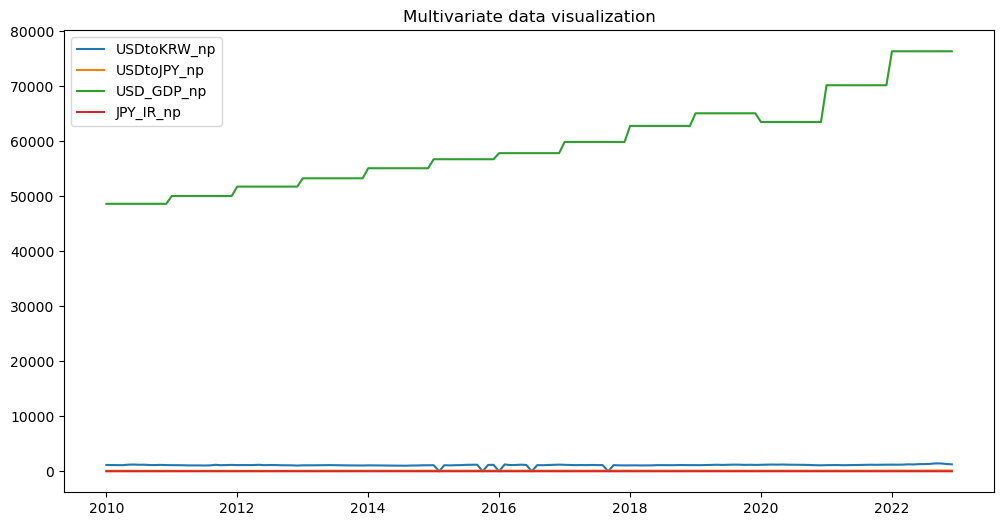

In [28]:

# 데이터프레임 생성
data = pd.DataFrame({'Date': date_range,
                     'USDtoKRW_np': USDtoKRW_np,
                     'USDtoJPY_np': USDtoJPY_np,
                     # 'USDtoMXN_np': USDtoMXN_np,
                     'USD_GDP_np': USD_GDP_np,
                     'JPY_IR_np': JPY_IR_np}
                     )
data.set_index('Date', inplace=True)

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['USDtoKRW_np'], label='USDtoKRW_np')
plt.plot(data['USDtoJPY_np'], label='USDtoJPY_np')
# plt.plot(data['USDtoMXN_np'], label='USDtoMXN_np')
plt.plot(data['USD_GDP_np'], label='USD_GDP_np')
plt.plot(data['JPY_IR_np'], label='JPY_IR_np')
plt.legend()
# plt.title('다변량 데이터 시각화')
plt.title('Multivariate data visualization')
plt.show()


In [29]:

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# 시계열 데이터를 입력 시퀀스로 변환
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


# LSTM의 시퀀스 길이는 입력 및 출력 데이터의 시퀀스 길이를 나타냄.
# 주어진 작업에 따라 시퀀스 길이는 다를 수 있으며, 입력 시퀀스의 길이와 출력 시퀀스의 길이가 서로 다를 수도 있음
# 예를 들어, 자연어 처리(NLP) 작업에서 LSTM을 사용할 때, 입력 시퀀스는 텍스트 문장의 단어들로 구성되며,
# 출력 시퀀스는 예측된 다음 단어나 번역된 문장과 같은 것일 수 있음.

seq_length = 2  # 시퀀스 길이 설정
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 4)))
model.add(Dense(4))  # 출력 노드 수는 다변량 데이터의 변수 개수와 동일해야 함

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

########
# 모델 학습
model.fit(X_train, y_train, epochs=1000, batch_size=64)

# 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f"테스트 데이터 손실: {test_loss:.4f}")

# 예측
y_pred = model.predict(X_test)

# 정규화된 데이터를 원래 스케일로 변환
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)


# 모델 저장
model_save_path = 'exchange_rate_model.h5'
model.save(model_save_path)


Epoch 1/1000
2/2 [==============================] - 4s 13ms/step - loss: 0.3532
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3419
Epoch 3/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3310
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.3205
Epoch 5/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.3106
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.3007
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2913
Epoch 8/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2820
Epoch 9/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2729
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.2640
Epoch 11/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2553
Epoch 12/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.2466
Epoch 13/1000
2/2 [=====================

/usr/local/anaconda3/envs/SeSAC/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


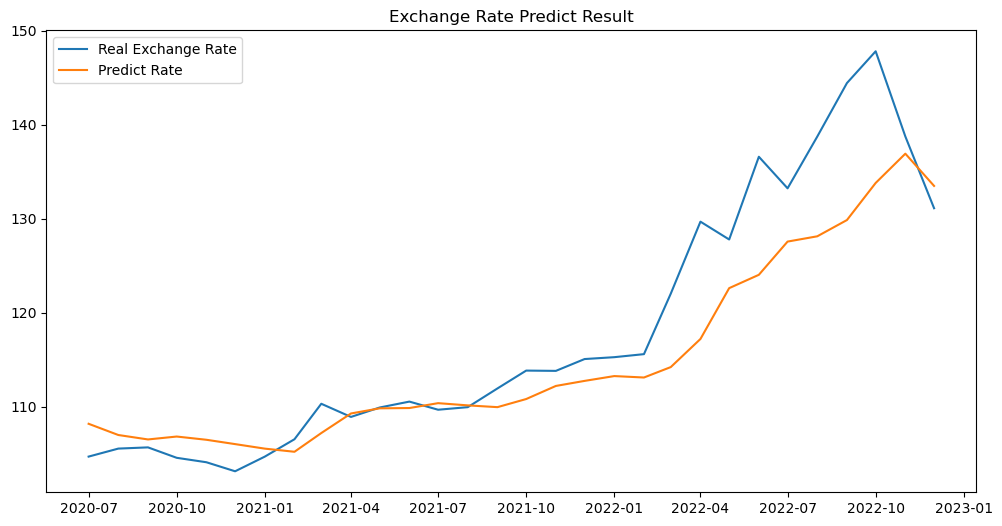

In [39]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test[:, 1], label='Real Exchange Rate')
plt.plot(data.index[-len(y_pred):], y_pred[:, 1], label='Predict Rate')
plt.legend()
# plt.title('다변량 환율 예측 결과')
plt.title('Exchange Rate Predict Result')
plt.show()

1/1 [==============================] - 0s 59ms/step


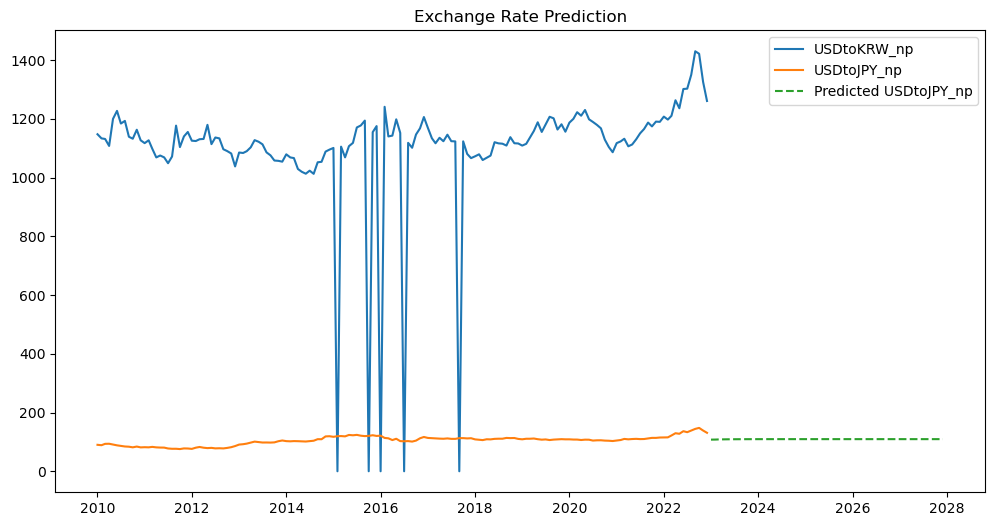

In [33]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import load_model
# 
# # 2023년부터 2050년까지의 날짜 범위 생성
# future_dates = pd.date_range(start='2023-01-01', end='2027-12-31', freq='MS')
# 
# # Load the pre-trained LSTM model
# model = load_model('exchange_rate_model.h5')
# 
# # LSTM을 사용하여 환율 예측
# future_predictions = []
# 
# # 초기 입력 데이터 설정 (예: 마지막 시점의 데이터)
# last_input_data = train_data[-seq_length:].reshape(1, seq_length, 5)
# 
# for date in future_dates:
#     # 모델을 사용하여 다음 달의 환율을 예측
#     next_month_prediction = model.predict(last_input_data)
#     future_predictions.append(next_month_prediction)
# 
#     # 예측값을 다음 입력 데이터로 사용
#     last_input_data = np.append(last_input_data[:, 1:, :], next_month_prediction.reshape(1, 1, 5), axis=1)
# 
# # 예측 결과를 Pandas DataFrame으로 변환
# future_predictions = np.array(future_predictions).reshape(-1, 5)
# predicted_data = pd.DataFrame(future_predictions, columns=['USDtoKRW_np', 'USDtoJPY_np', 'USDtoMXN_np', 'USD_GDP_np', 'JPY_IR_np'], index=future_dates)
# 
# # 언스케일 (minmax > 정상화)
# predicted_data['USDtoJPY_np'] = scaler.inverse_transform(predicted_data['USDtoJPY_np'])
# 
# # 시각화
# plt.figure(figsize=(12, 6))
# 
# plt.plot(data['USDtoKRW_np'], label='USDtoKRW_np')
# plt.plot(data['USDtoJPY_np'], label='USDtoJPY_np')
# plt.plot(data['USDtoMXN_np'], label='USDtoMXN_np')
# # plt.plot(data['USD_GDP_np'], label='USD_GDP_np')
# # plt.plot(data['JPY_IR_np'], label='JPY_IR_np')
# 
# plt.plot(predicted_data['USDtoJPY_np'], label='Predicted USDtoJPY_np', linestyle='--')
# plt.legend()
# plt.title('Exchange Rate Prediction')
# plt.show()
# 
# # 예측 결과를 엑셀 파일로 저장
# predicted_data.to_excel('exchange_rate_predictions_1.xlsx')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 2023년부터 2027년까지의 날짜 범위 생성
future_dates = pd.date_range(start='2023-01-01', end='2027-12-31', freq='MS')

# Load the pre-trained LSTM model
model = load_model('exchange_rate_model.h5')

# LSTM을 사용하여 환율 예측
future_predictions = []

# 초기 입력 데이터 설정 (예: 마지막 시점의 데이터)
last_input_data = train_data[-seq_length:].reshape(1, seq_length, 4)

for date in future_dates:
    # 모델을 사용하여 다음 달의 환율을 예측
    next_month_prediction = model.predict(last_input_data)
    future_predictions.append(next_month_prediction)

    # 예측값을 다음 입력 데이터로 사용
    last_input_data = np.append(last_input_data[:, 1:, :], next_month_prediction.reshape(1, 1, 4), axis=1)

# 예측 결과를 Pandas DataFrame으로 변환
future_predictions = np.array(future_predictions).reshape(-1, 4)
# predicted_data = pd.DataFrame(future_predictions, columns=['USDtoKRW_np', 'USDtoJPY_np', 'USDtoMXN_np', 'USD_GDP_np', 'JPY_IR_np'], index=future_dates)
predicted_data = pd.DataFrame(future_predictions, columns=['USDtoKRW_np', 'USDtoJPY_np','USD_GDP_np', 'JPY_IR_np'], index=future_dates)

# 언스케일 (minmax > 정상화)
# scaler_columns = ['USDtoKRW_np', 'USDtoJPY_np', 'USDtoMXN_np', 'USD_GDP_np', 'JPY_IR_np']
scaler_columns = ['USDtoKRW_np', 'USDtoJPY_np','USD_GDP_np', 'JPY_IR_np']
predicted_data[scaler_columns] = scaler.inverse_transform(predicted_data[scaler_columns])

# 시각화
plt.figure(figsize=(12, 6))

plt.plot(data['USDtoKRW_np'], label='USDtoKRW_np')
plt.plot(data['USDtoJPY_np'], label='USDtoJPY_np')
# plt.plot(data['USDtoMXN_np'], label='USDtoMXN_np')

plt.plot(predicted_data['USDtoJPY_np'], label='Predicted USDtoJPY_np', linestyle='--')  # 예측된 JPY 열만 사용

plt.legend()
plt.title('Exchange Rate Prediction')
plt.show()

# 예측 결과를 엑셀 파일로 저장
predicted_data_df = pd.DataFrame(predicted_data, columns=['USDtoKRW_np', 'USDtoJPY_np','USD_GDP_np', 'JPY_IR_np'], index=future_dates)
predicted_data_df.to_excel('exchange_rate_predictions_2.xlsx')


### 4-2. 모델 학습

#### 4-2-1. RNN 모델

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import SimpleRNN, Dense

# # 임의의 예제 데이터 생성
# X = np.random.rand(100, 1, 10)
# Y = np.random.rand(100, 10)

# # RNN 모델 구성
# model = Sequential()
# model.add(SimpleRNN(32, input_shape=(1, 10)))
# model.add(Dense(10, activation='softmax'))

# # 모델 학습 설정
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # 모델 학습
# history = model.fit(X, Y, epochs=10)

# # 성능 확인을 위한 시각화
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], 'b-', label='loss')
# plt.xlabel('Epoch')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], 'g-', label='accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# plt.show()

### 4-3. 모델 검증

## 5. 계산 모델 구축

### 5.1 알고리즘 구현

### 5-2. 결과 및 검증

## 6. 결과 분석

### 6-1. 결과 해석 및 시각화